<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/MLRAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MULTIPLE LINEAR REGRESSION
Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax:
Price: Offer Price in EUROs
Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df = df.reset_index(drop=True)
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.shape

(1436, 11)

In [ ]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
df.rename(columns={'Age_08_04':'age'},inplace=True)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.isnull().sum()

,0
Price,0
age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,Price,age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


<Axes: >

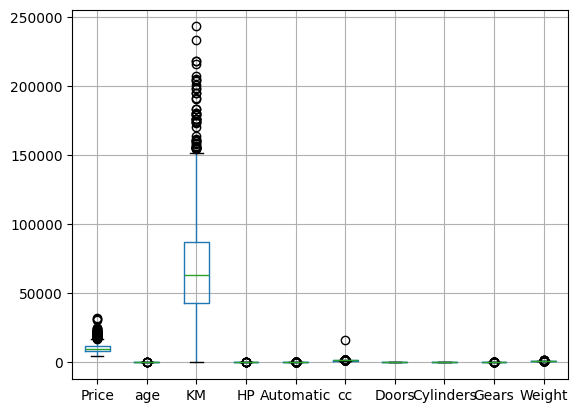

In [ ]:
df.boxplot()

In [ ]:
num_cols=df.select_dtypes(include=['int','float']).columns

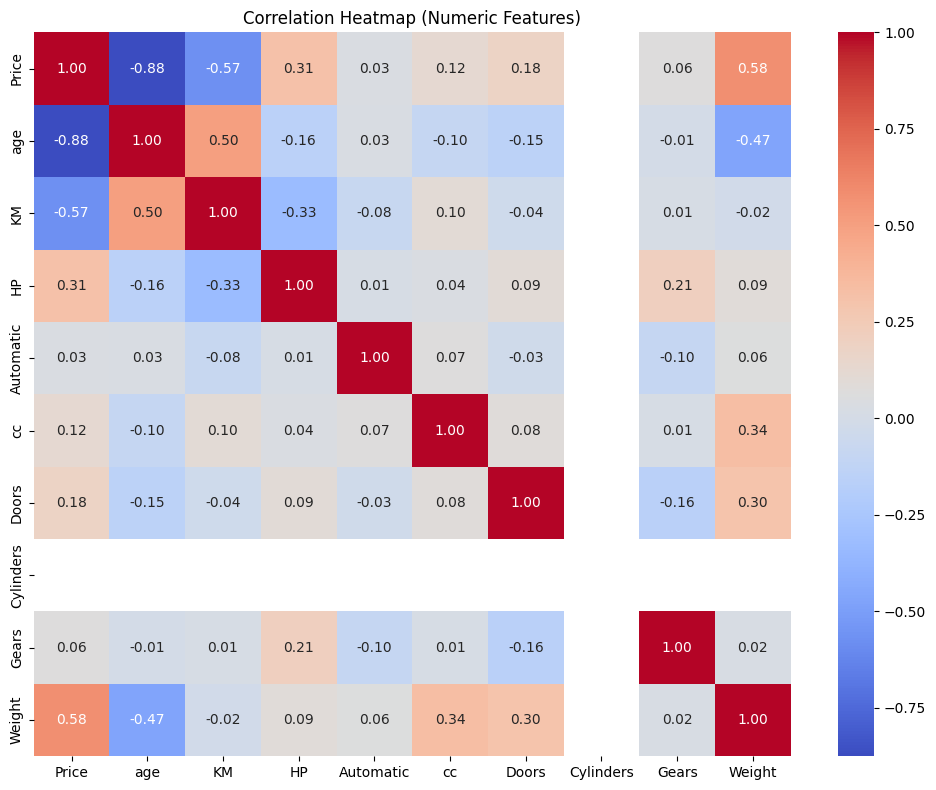

In [ ]:
plt.figure(figsize=(10, 8))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

# scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Price', 'age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:

df1=df[['age', 'KM', 'HP','Automatic','cc','Weight']]

In [ ]:
std_sca = StandardScaler()

df[['age','KM','HP','cc','Weight']] = std_sca.fit_transform(df[['age','KM','HP','cc','Weight']])

df2=pd.get_dummies(df,dtype='int')
df2
#features = pd.concat([df,df2],axis=1)

,Price,age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,-1.777268,-0.575958,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
1,13750,-1.777268,0.116474,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
2,13950,-1.723380,-0.716707,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
3,14950,-1.615603,-0.548902,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
4,13750,-1.400049,-0.802384,-0.767351,0,0.998113,3,4,5,1.870688,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.701602,-1.281492,-1.034441,0,-0.651898,3,4,5,-0.905299,0,0,1
1432,10845,0.863267,-1.322689,-1.034441,0,-0.651898,3,4,5,-1.096747,0,0,1
1433,8500,0.809379,-1.375627,-1.034441,0,-0.651898,3,4,5,-1.096747,0,0,1
1434,7250,0.755490,-1.378295,-1.034441,0,-0.651898,3,4,5,-1.096747,0,0,1


In [ ]:
target=df2['Price']
display(target.shape)
features=df2.drop(['Price'],axis=1)
features.shape
features.head()

(1435,)

,age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.777268,-0.575958,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
1,-1.777268,0.116474,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
2,-1.723380,-0.716707,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
3,-1.615603,-0.548902,-0.767351,0,0.998113,3,4,5,1.774964,0,1,0
4,-1.400049,-0.802384,-0.767351,0,0.998113,3,4,5,1.870688,0,1,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 12)
(287, 12)
(1148,)
(287,)


In [ ]:
x_test

,age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
57,-1.615603,-0.682314,-0.299942,0,-0.416182,5,4,5,0.722003,0,0,1
1003,0.324382,-0.789043,0.568103,0,0.055249,5,4,5,0.051938,0,0,1
361,-1.130607,-1.188984,-0.299942,0,-0.416182,3,4,5,-0.905299,0,0,1
904,0.270494,-0.255397,0.568103,0,0.055249,5,4,5,-0.043786,0,0,1
1277,1.240486,0.147319,0.568103,0,0.055249,5,4,5,0.051938,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110,-2.801149,-1.722924,0.968739,0,0.998113,5,4,5,7.805557,0,1,0
199,-0.915053,0.807172,0.568103,0,0.055249,5,4,5,0.894306,1,0,0
67,-1.831157,-1.018511,-0.299942,0,-0.416182,5,4,5,0.722003,0,0,1
518,-0.430056,-0.469736,-0.299942,0,-0.416182,5,4,5,-0.235233,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
multi_lin=LinearRegression()

In [ ]:
multi_lin.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=multi_lin.predict(x_test)

In [ ]:
y_pred

array([15519.15757274, 10802.29641687, 13127.05925628, 10477.15897914,
        8060.94370096,  9507.21953129, 13901.64628164,  6406.73799379,
       13280.07687263,  8480.90523168, 13256.44710463,  7751.60839357,
       11530.26101381,  4973.21511887, 18095.63989004,  8301.37557754,
       13568.94943658, 15532.9258915 , 16609.85166806,  9377.55668078,
       12442.74808169, 10826.51981924, 10875.63351377, 11916.52599349,
        8309.35666586,  8281.02835133,  9819.13773377,  8500.88045916,
        9453.68158052,  8073.4306245 ,  9080.26621939, 12038.80437689,
        6548.19473192, 19076.24910159,  9484.52130565,  9441.34663438,
        7197.81553444,  8107.12310884, 14182.7596988 , 10689.04703999,
        7672.96939965,  8004.02443812,  9813.08240932, 13883.68840519,
        8494.09305188,  9226.35670393, 12568.02641083,  6892.97838298,
       11001.28699829, 12816.24147838, 10050.04209763, 12895.84286301,
       12704.20812125, 14537.93255013, 19532.08395341, 11050.40025301,
      

In [ ]:
y_test

,Price
57,15250
1003,10250
361,11500
904,9450
1277,8800
...,...
110,31000
199,11950
67,14950
518,10495


In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 1590943.25
R-squared (R2) Score: 0.87


In [ ]:
features.columns

Index(['age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as sfa

In [ ]:
model=sfa.ols(formula='Price~age+KM+HP+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df2_encoded).fit()

In [ ]:
model

In [ ]:
model.params

,0
Intercept,426.023731
age,-2286.113926
KM,-657.968177
HP,334.721698
cc,-14.181510
Doors,-38.474104
Cylinders,1704.094922
Gears,589.359486
Weight,1108.361236
Fuel_Type_CNG,-394.883125


In [ ]:
model.rsquared

np.float64(0.8634250203793776)

In [ ]:
model.rsquared_adj

np.float64(0.862562441560721)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1001.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:15:15   Log-Likelihood:                -12361.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1425   BIC:                         2.480e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          426.0237     59.542      7.155      0.000     309.224     542.824
age              -2286.1139     48.418    -47.216      0.000   -2381.092   -2191.136
KM                -657.9682     49.901    -13.186      0.000    -755.855    -560.081
HP                 334.7217     53.017      6.314      0.000     230.722     438.721
cc                 -14.1815     38.841     -0.365      0.715     -90.373      62.010
Doors              -38.4741     40.657     -0.946      0.344    -118.228      41.280
Cylinders         1704.0949    238.169      7.155      0.000    1236.895    2171.295
Gears              589.3595    197.038      2.991      0.003     202.844     975.875
Weight            1108.3612     62.103     17.847      0.000     986.538    1230.185
Fuel_Type_CNG     -394.8831    228.405     -1.729      0.084    -842.929      53.163
Fuel_Type_Diesel    60.9446    178.571      0.341      0.733    -289.346     411.236
Fuel_Type_Petrol   759.9623    145.971      5.206      0.000     473.621    1046.303
==============================================================================
Omnibus:                      279.835   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3080.999
Skew:                          -0.568   Prob(JB):                         0.00
Kurtosis:                      10.088   Cond. No.                     5.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Lasso

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [ ]:
b1=lasso.coef_
b1

array([-2309.25114039,  -668.69671394,   412.00460772,   389.25771783,
         -15.33826022,     6.50230196,     0.        ,   696.51705938,
         978.27744309,  -542.6714541 ,    -0.        ,   278.74181171])

In [ ]:
b0=lasso.intercept_
b0

np.float64(6946.413748730236)

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8666692756894522

In [ ]:
# Grid search

In [ ]:
params=dict(alpha=np.arange(0.01,10,0.1))
params

{'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
        1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
        2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
        3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
        4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
        5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
        6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
        7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
        8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
        9.91])}

In [ ]:
gridsearch=GridSearchCV(estimator=lasso,param_grid=params,cv=5)

In [ ]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])})

In [ ]:
gridsearch.best_params_

{'alpha': np.float64(9.91)}

In [ ]:
# Ridge

In [ ]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [ ]:
y_pred=ridge.predict(x_test)
y_pred

array([15515.43287981, 10804.82296142, 13125.92770127, 10478.57120795,
        8064.63032961,  9503.22910312, 13900.05729637,  6406.03278895,
       13278.12502529,  8482.82927202, 13255.8240609 ,  7745.49978118,
       11531.54743899,  4971.12845352, 18091.30988007,  8305.13319062,
       13568.11790938, 15531.93312685, 16606.7917869 ,  9381.67083612,
       12441.41439209, 10810.5394227 , 10876.92859423, 11916.95423074,
        8310.01286976,  8282.15670717,  9821.96787349,  8500.8336123 ,
        9455.56694886,  8077.08407472,  9080.8290175 , 12037.62152439,
        6551.84334517, 19071.6442777 ,  9486.97151712,  9443.20011461,
        7200.88558124,  8104.44475972, 14179.95697633, 10689.49975988,
        7677.80182669,  8007.98357736,  9815.63665047, 13883.35943923,
        8495.28710239,  9227.78228959, 12568.59983304,  6893.42907496,
       11000.10780082, 12815.11444549, 10053.95428438, 12893.75634827,
       12701.25266403, 14537.01824836, 19529.24434235, 11050.38069042,
      

In [ ]:
r2_score(y_test,y_pred)

0.86668501335392

In [ ]:
#grid search

In [ ]:
params=dict(alpha=np.arange(0.01,10,0.1))
params

{'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
        1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
        2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
        3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
        4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
        5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
        6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
        7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
        8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
        9.91])}

In [ ]:
gridsearch=GridSearchCV(estimator=ridge,param_grid=params,cv=5)

In [ ]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid={'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])})

In [ ]:
gridsearch.best_params_

{'alpha': np.float64(9.91)}